# Import Python libs

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

from sklearn.datasets import make_blobs, make_circles, make_moons

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.metrics import silhouette_samples

# Lab: k-Means Clustering

In [2]:
def plotClusters(algorithm, parameter):
    plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
    title = ""
    if algorithm == "KMeans":
        title = "Real clusters, KMeans, init = " + parameter
    if algorithm == "AgglomerativeClustering":
        title = "Real clusters, AgglomerativeClustering, linkage = " + parameter
    else:
        title = "Real clusters, DBSCAN, eps = " + parameter
        
    plt.title(title)
    plt.show()

    if algorithm == "KMeans":
        title = "Predicted clusters, KMeans, init = " + parameter
    if algorithm == "AgglomerativeClustering":
        title = "Predicted clusters, AgglomerativeClustering, linkage = " + parameter
    else:
        title = "Predicted clusters, DBSCAN, eps = " + parameter
        
    plt.scatter(attributes[:, 0], attributes[:, 1], c = assigned)
    plt.title(title)
    plt.show()

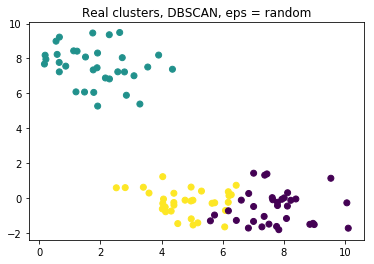

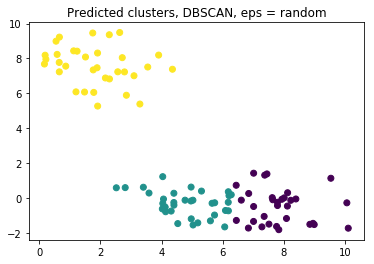

In [3]:
# Blobs
attributes, clusters = make_blobs()

k_means = KMeans(3, init = "random")
assigned = k_means.fit_predict(attributes)
plotClusters("KMeans", "random")


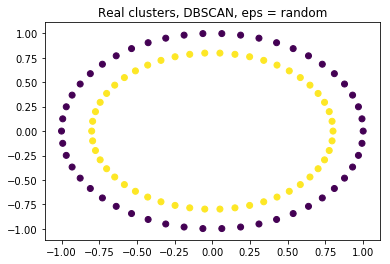

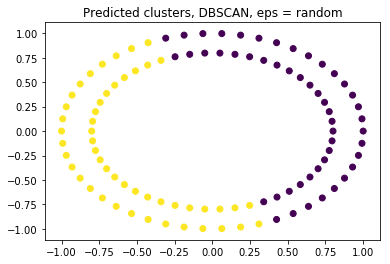

In [4]:
# Circles
attributes, clusters = make_circles()

k_means = KMeans(2, init = "random")
assigned = k_means.fit_predict(attributes)

plotClusters("KMeans", "random")

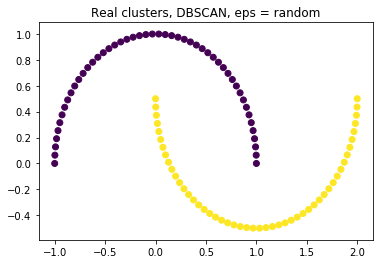

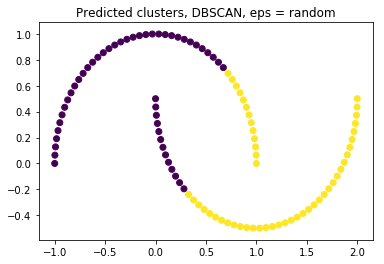

In [5]:
# Moons
attributes, clusters = make_moons()

k_means = KMeans(2, init = "random")
assigned = k_means.fit_predict(attributes)

plotClusters("KMeans", "random")

# Lab: k-Means++

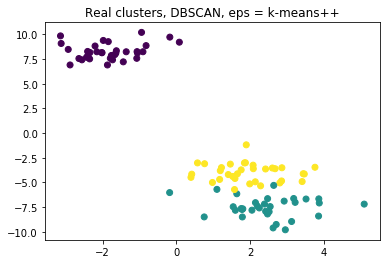

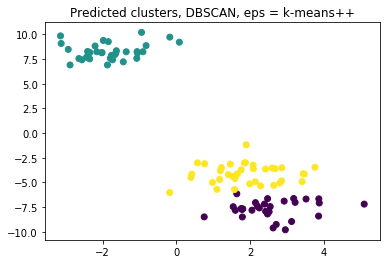

In [6]:
# Blobs
attributes, clusters = make_blobs()

k_means_pp = KMeans(3, init = "k-means++")
assigned = k_means_pp.fit_predict(attributes)

plotClusters("KMeans", "k-means++")

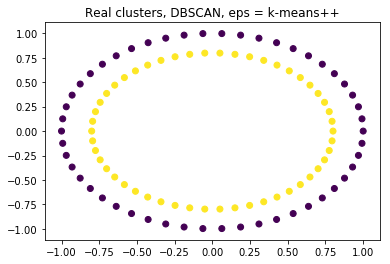

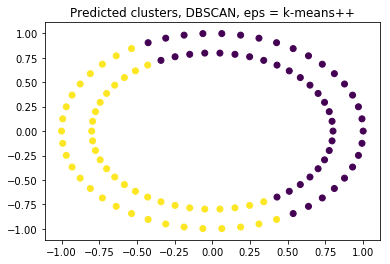

In [7]:
# Circles
attributes, clusters = make_circles()

k_means_pp = KMeans(2, init = "k-means++")
assigned = k_means_pp.fit_predict(attributes)

plotClusters("KMeans", "k-means++")

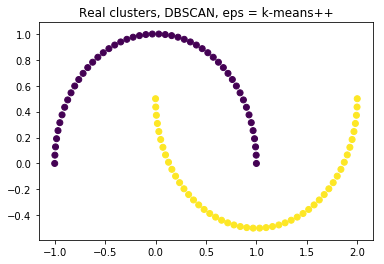

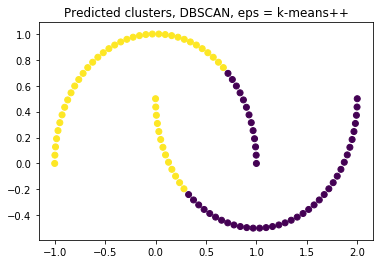

In [8]:
# Moons
attributes, clusters = make_moons()

k_means_pp = KMeans(2, init = "k-means++")
assigned = k_means_pp.fit_predict(attributes)

plotClusters("KMeans", "k-means++")

# Finding an Optimal Number of Clusters (elbow method)

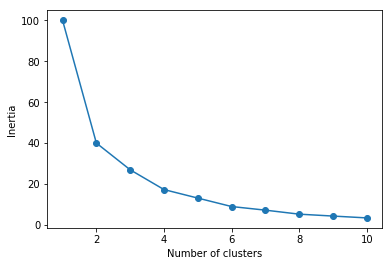

In [9]:
inertias = []

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(attributes)
    inertias.append(km.inertia_)

# Find the "elbow point" of the plot – optimal
plt.plot(range(1,11), inertias, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Lab: Silhouette analysis

In [10]:
def createSilhouettePlot():
    y_min, y_max = 0, 0
    y_ticks = []
    
    cluster_labels = np.unique(clusters)
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[predicted == c]
        c_silhouette_vals.sort()
        y_max += len(c_silhouette_vals)
        color = matplotlib.cm.jet(i / cluster_labels.shape[0])
        plt.barh(range(y_min, y_max), c_silhouette_vals, color = color)
        y_min += len(c_silhouette_vals)

    plt.xlabel("Silhouette coefficient")
    plt.show()

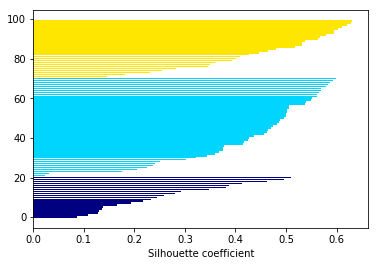

In [11]:
attributes, clusters = make_blobs()
km = KMeans(3)

predicted = km.fit_predict(attributes)
silhouette_vals = silhouette_samples(attributes, predicted)
createSilhouettePlot()

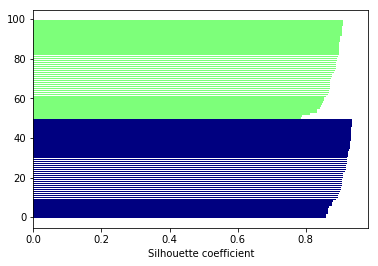

In [12]:
attributes, clusters = make_blobs(centers = 2)
km = KMeans(2)

predicted = km.fit_predict(attributes)
silhouette_vals = silhouette_samples(attributes, predicted)
createSilhouettePlot()

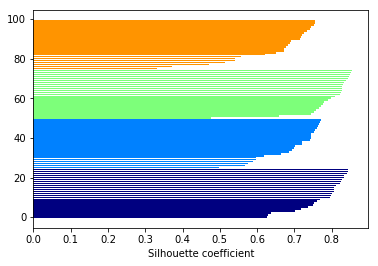

In [13]:
attributes, clusters = make_blobs(centers = 4)
km = KMeans(4)

predicted = km.fit_predict(attributes)
silhouette_vals = silhouette_samples(attributes, predicted)
createSilhouettePlot()

# Lab: Hierarchical Clustering (agglomerative)

In [14]:
# Plot a dengrogram
def plotDendogram(linkg):
    row_clusters = linkage(attributes, method = "complete", metric = "euclidean")
    row_dendr = dendrogram(row_clusters, labels = clusters)
    plt.title("linkage = " + linkg)
    plt.show()

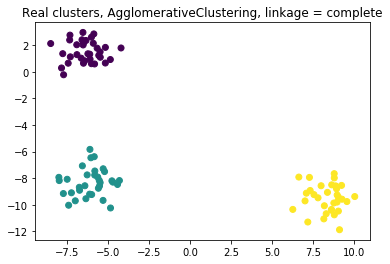

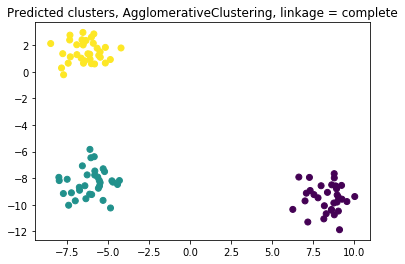

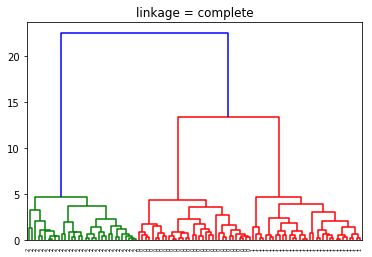

In [15]:
# Blobs, linkage = "complete"
attributes, clusters = make_blobs()

aggl = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "complete")
plotDendogram("complete")

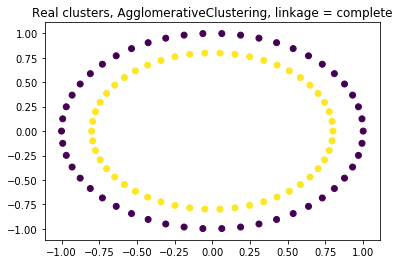

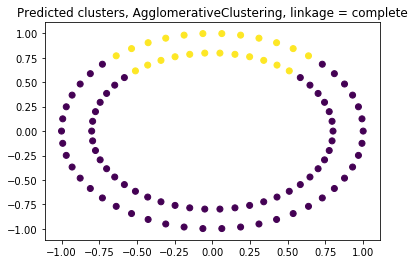

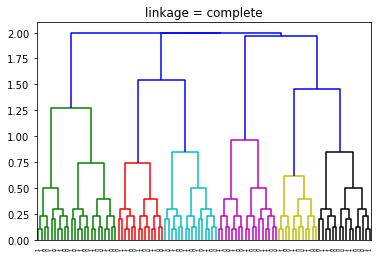

In [16]:
# Circles, linkage = "complete"
attributes, clusters = make_circles()

aggl = AgglomerativeClustering(n_clusters = 2, linkage = "complete")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "complete")
plotDendogram("complete")

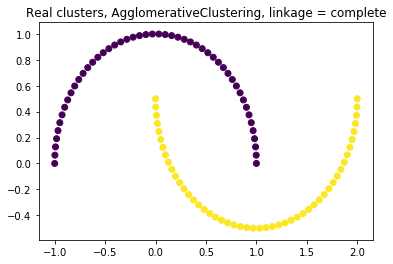

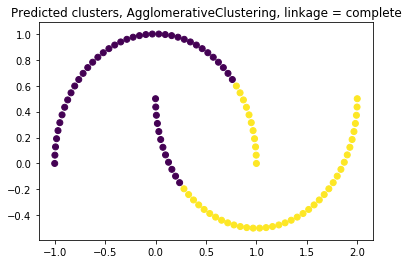

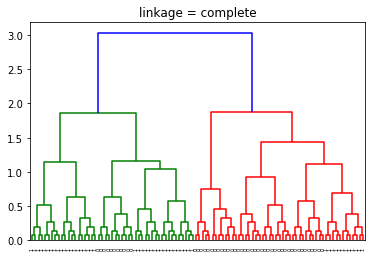

In [17]:
# Moons, linkage = "complete"
attributes, clusters = make_moons()

aggl = AgglomerativeClustering(n_clusters = 2, linkage = "complete")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "complete")
plotDendogram("complete")

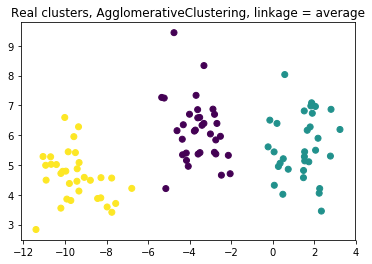

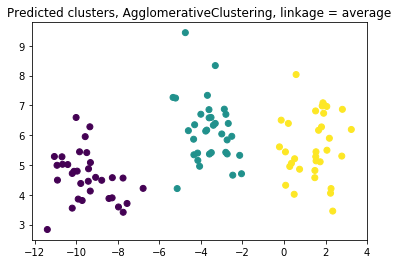

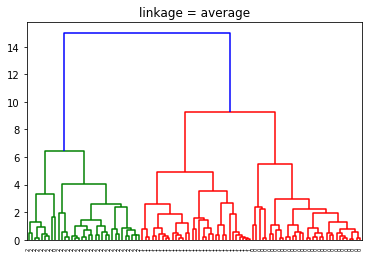

In [18]:
# Blobs, linkage = "average"
attributes, clusters = make_blobs()

aggl = AgglomerativeClustering(n_clusters = 3, linkage = "average")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "average")
plotDendogram("average")

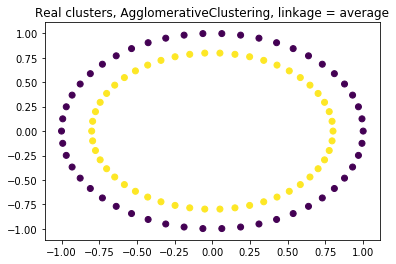

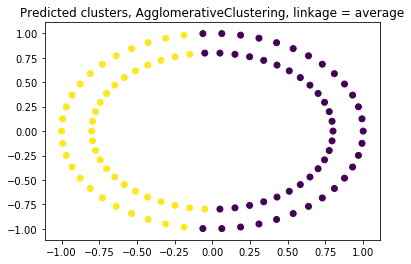

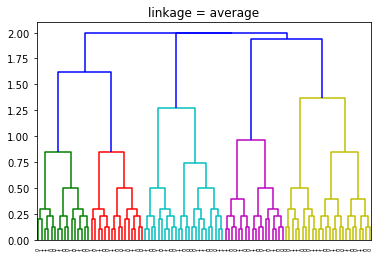

In [19]:
# Circles, linkage = "average"
attributes, clusters = make_circles()

aggl = AgglomerativeClustering(n_clusters = 2, linkage = "average")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "average")
plotDendogram("average")

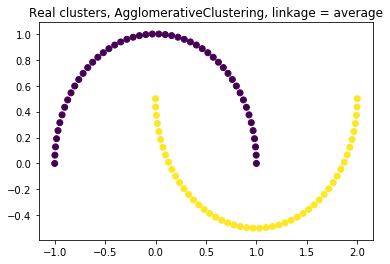

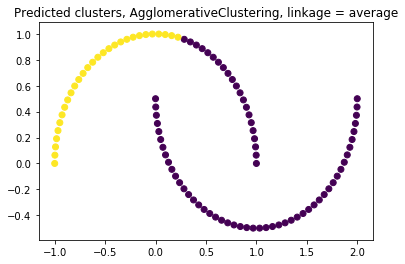

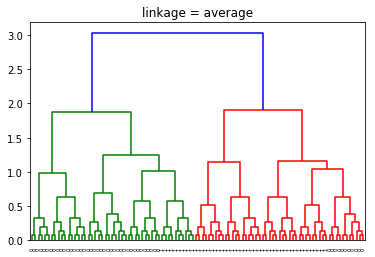

In [20]:
# Moons, linkage = "average"
attributes, clusters = make_moons()

aggl = AgglomerativeClustering(n_clusters = 2, linkage = "average")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "average")
plotDendogram("average")

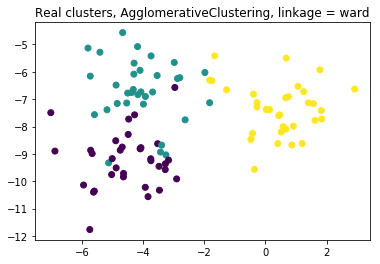

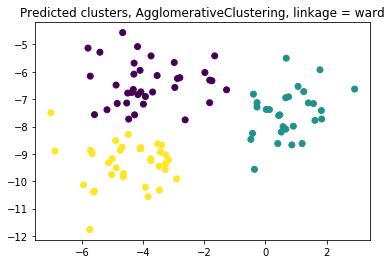

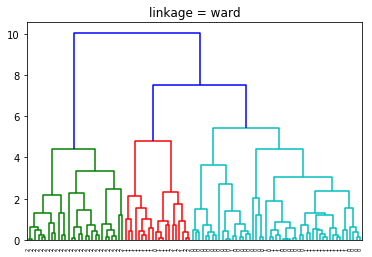

In [21]:
# Blobs, linkage = "ward"
attributes, clusters = make_blobs()

aggl = AgglomerativeClustering(n_clusters = 3, linkage = "ward")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "ward")
plotDendogram("ward")

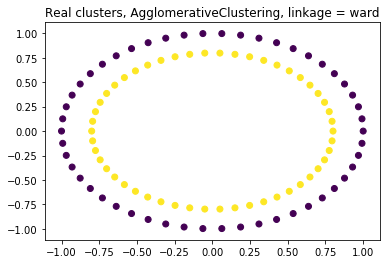

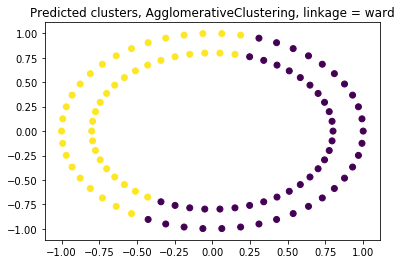

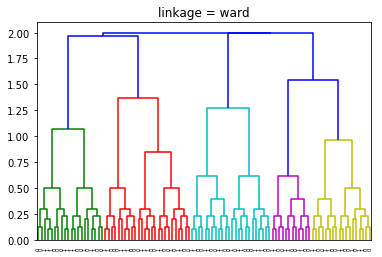

In [22]:
# Circles, linkage = "ward"
attributes, clusters = make_circles()

aggl = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "ward")
plotDendogram("ward")

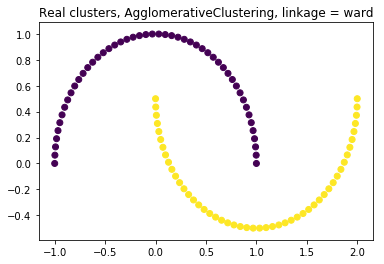

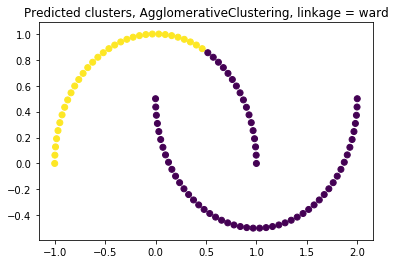

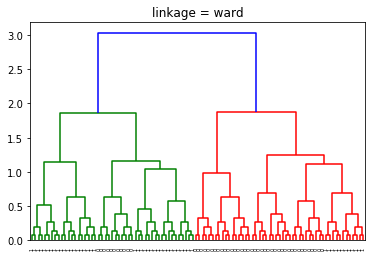

In [23]:
# Moons, linkage = "ward"
attributes, clusters = make_moons()

aggl = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
assigned = aggl.fit_predict(attributes)

plotClusters("AgglomerativeClustering", "ward")
plotDendogram("ward")

# Lab: DBSCAN

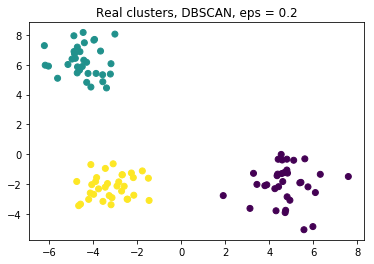

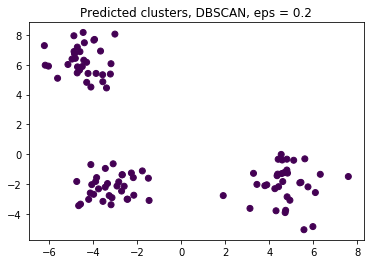

In [24]:
# Blobs
attributes, clusters = make_blobs()
db = DBSCAN(eps = 0.2, min_samples = 5, metric = "euclidean")
assigned = db.fit_predict(attributes)
plotClusters("DBSCAN", "0.2")

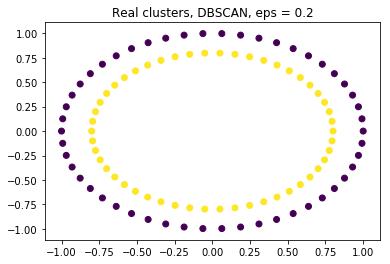

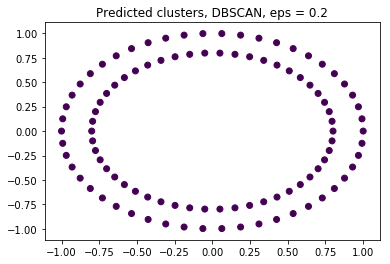

In [25]:
# Circles
attributes, clusters = make_circles()
db = DBSCAN(eps = 0.2, min_samples = 5, metric = "euclidean")
assigned = db.fit_predict(attributes)
plotClusters("DBSCAN", "0.2")

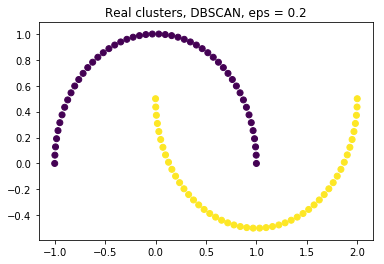

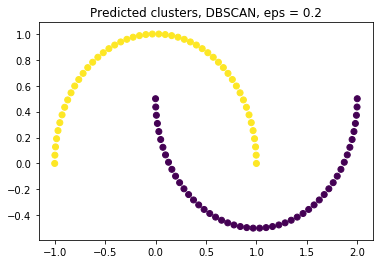

In [26]:
# Moons
attributes, clusters = make_moons()
db = DBSCAN(eps = 0.2, min_samples = 5, metric = "euclidean")
assigned = db.fit_predict(attributes)
plotClusters("DBSCAN", "0.2")